In [8]:
using ModelingToolkit, DifferentialEquations, Plots, LinearAlgebra
using ModelingToolkit: t_nounits as t, D_nounits as D

#An attempt to use vecorized representation for the standard Lotka-Volterra model.

#First build the symbolic model


N=2

@variables p(t)[1:N]
@parameters a[1:N,1:N]

#define the community matrix

c=[
    a[1,1]      a[1,2]*p[1];
    a[2,1]*p[2] a[2,2]
]


#define equations

eqs = [
    D.(p) ~ collect(c*p)
        ]

#build model symbolically
@mtkbuild model = ODESystem(eqs, t)


Model model:
Equations (2):
  2 standard: see equations(model)
Unknowns (2): see unknowns(model)
  (p(t))[1]
  (p(t))[2]
Parameters (1): see parameters(model)
  a

In [ ]:
# build numerical problem to solve, i.e. set parameter values and initial conditions

am=[0.1 -0.5;
    0.1 -0.1]

prob = ODEProblem(model, [p[1] => 0.3, p[2] => 0.5], (0.0, 100), [a => am])



ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
Initialization status: FULLY_DETERMINED
Non-trivial mass matrix: false
timespan: (0.0, 100.0)
u0: 2-element Vector{Float64}:
 0.3
 0.5

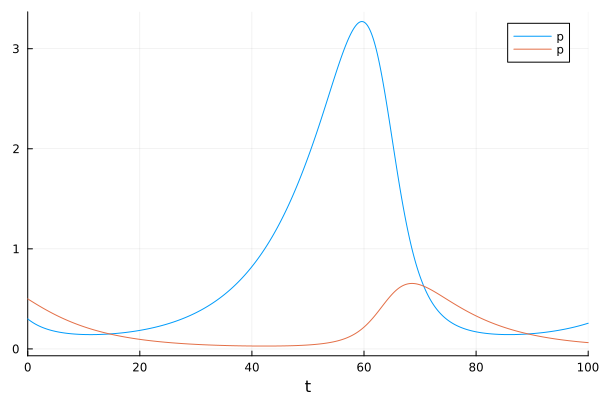

In [18]:
#numerically solve the problem and plot it

sol = solve(prob,Tsit5())
plot(sol, idxs = (p[1]))
plot!(sol, idxs = (p[2]))

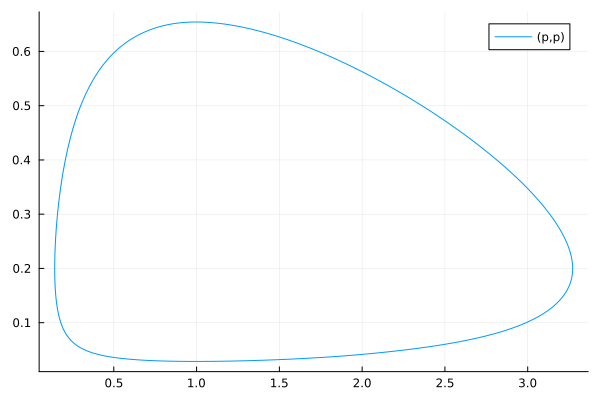

In [20]:
plot(sol, idxs = (p[1],p[2]))